# Final models comparison and summary

### Dependencies loading

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pickle
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 150)

### Final models comparison

Now we have to use our 6 models to score our test set!

#### Naive Model

In case of Naive Model we have already scored our test set!

In [2]:
naive_model_score = pd.read_csv("final_models/naive.csv", index_col = 0)

In [3]:
naive_model_score.rename(index={0: 'naive_model'},inplace=True)

In [4]:
naive_model_score

,RMSE,MAE
naive_model,0.16786,0.091059


#### OLS

In [5]:
df_train = pd.read_csv("../data/train_fe.csv", index_col=0)
df_test = pd.read_csv("../data/test_fe.csv", index_col=0)

In [6]:
X = ['adv_cat_(874.5, inf]', 'diff_positive', 'str_cat_(0.0875, 0.192]', 'ta_log', 'WB_GDPpc', 'txt_cat_(0.488, 24.415]', 'txt_cat_(-34.811, 0.488]', 'gielda_2', 'ppe_clip', 'revenue_cat_(1248.817, 4233.587]', 'revenue_cat_(4233.587, inf]', 'pi_cat_(8108.5, inf]', 'revenue_cat_(0.174, 1248.817]', 'roa_clip', 'pi_cat_(-8975.0, -1.523]', 'pi_cat_(157.119, 465.9]', 'pi_cat_(465.9, 7875.5]', 'pi_cat_(-1.523, 157.119]']

In [7]:
model = pickle.load(open("final_models/ols.sav", 'rb'))

In [8]:
y_pred = model.predict(df_test.loc[:,X].values)

In [9]:
y_true = df_test.etr.tolist()
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
ols_model_score = pd.DataFrame([rmse, mae]).T.rename(columns ={0:"RMSE", 1:"MAE"})

<Figure size 720x360 with 0 Axes>

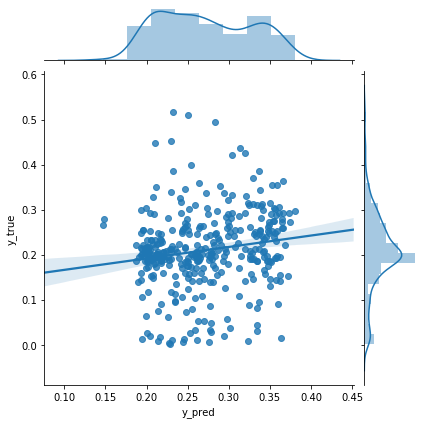

In [10]:
comp = pd.DataFrame([y_pred, y_true]).rename({0:"y_pred", 1:"y_true"}).T
plt.figure(figsize=(10, 5))
sns.jointplot(comp.y_pred, comp.y_true, kind="reg", truncate=False,)

In [11]:
ols_model_score.rename(index={0: 'ols_model'},inplace=True)

In [12]:
ols_model_score

,RMSE,MAE
ols_model,0.113211,0.08711


#### ARMA

In case of ARMA we have already scored our test set!

In [13]:
arma_model_score = pd.read_csv("final_models/arma.csv", index_col = 0)

In [14]:
arma_model_score.rename(index={0: 'arma_model'},inplace=True)

In [15]:
arma_model_score

,RMSE,MAE
arma_model,0.124843,0.080011


#### ARDL

In [16]:
df_train = pd.read_csv("../data/train_fe.csv", index_col=0)
df_test = pd.read_csv("../data/test_fe.csv", index_col=0)

In [17]:
X = ['sale', 'cfc', 'txt_cat_(-34.811, 0.488]', 'txt_cat_(0.488, 24.415]',
       'txt_cat_(308.55, 327.531]', 'pi_cat_(7875.5, 8108.5]',
       'str_cat_(0.28, inf]', 'dlc_cat_(176.129, 200.9]', 'diff_positive',
       'etr_y_ma']

In [18]:
model = pickle.load(open("final_models/ardl.sav", 'rb'))

In [19]:
y_pred = model.predict(df_test.loc[:,X].values)

In [20]:
y_true = df_test.etr.tolist()
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
ardl_model_score = pd.DataFrame([rmse, mae]).T.rename(columns ={0:"RMSE", 1:"MAE"})

<Figure size 720x360 with 0 Axes>

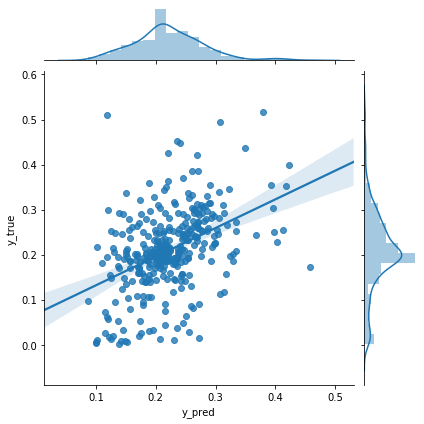

In [21]:
comp = pd.DataFrame([y_pred, y_true]).rename({0:"y_pred", 1:"y_true"}).T
plt.figure(figsize=(10, 5))
sns.jointplot(comp.y_pred, comp.y_true, kind="reg", truncate=False,)

In [22]:
ardl_model_score.rename(index={0: 'ardl_model'},inplace=True)

In [23]:
ardl_model_score

,RMSE,MAE
ardl_model,0.082121,0.05862


#### KNN

In [24]:
df_train = pd.read_csv("../data/train_fe.csv", index_col=0)
df_test = pd.read_csv("../data/test_fe.csv", index_col=0)

In [25]:
X = ['ta', 'txt', 'pi', 'str', 'xrd', 'ni', 'ppent', 'intant', 'dlc', 'dltt', 'capex', 'revenue', 'cce', 'adv', 'etr', 'diff', 'roa', 'lev', 'intan', 'rd', 'ppe', 'sale', 'cash_holdings', 'adv_expenditure', 'capex2', 'cfc', 'dta', 'y_v2x_polyarchy', 'WB_GDPgrowth', 'WB_GDPpc', 'WB_Inflation', 'rr_per_country', 'rr_per_sector', 'etr_y_past', 'etr_y_ma', 'diff_ma', 'roa_ma', 'lev_ma', 'intan_ma', 'ppe_ma', 'sale_ma', 'cash_holdings_ma', 'roa_past', 'lev_past', 'intan_past', 'ppe_past', 'sale_past', 'cash_holdings_past']
standardization = ['rok', 'ta', 'txt', 'pi', 'str', 'xrd', 'ni', 'ppent', 'intant', 'dlc', 'dltt', 'capex', 'revenue', 'cce', 'adv', 'diff', 'roa', 'lev', 'intan', 'rd', 'ppe', 'sale', 'cash_holdings', 'adv_expenditure', 'capex2', 'capex2_scaled', 'y_v2x_polyarchy', 'WB_GDPgrowth', 'WB_GDPpc', 'WB_Inflation', 'rr_per_country', 'rr_per_sector', 'ta_log', 'ppent_sqrt', 'intant_sqrt', 'roa_clip', 'lev_sqrt', 'intan_pow2', 'rd_sqrt', 'ppe_clip', 'cash_holdings_sqrt', 'diff_dta', 'etr_y_past', 'etr_y_ma', 'diff_ma', 'roa_ma', 'lev_ma', 'intan_ma', 'ppe_ma', 'sale_ma', 'cash_holdings_ma', 'roa_past', 'lev_past', 'intan_past', 'ppe_past', 'sale_past', 'cash_holdings_past', 'y_e_p_polity']

In [26]:
scaler = pickle.load(open("final_models/minmaxscaler.sav", 'rb'))
df_test[standardization] = scaler.transform(df_test[standardization])

In [27]:
model = pickle.load(open("final_models/knn.sav", 'rb'))

In [28]:
y_pred = model.predict(df_test.loc[:,X].values)

In [29]:
y_true = df_test.etr.tolist()
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
knn_model_score = pd.DataFrame([rmse, mae]).T.rename(columns ={0:"RMSE", 1:"MAE"})

<Figure size 720x360 with 0 Axes>

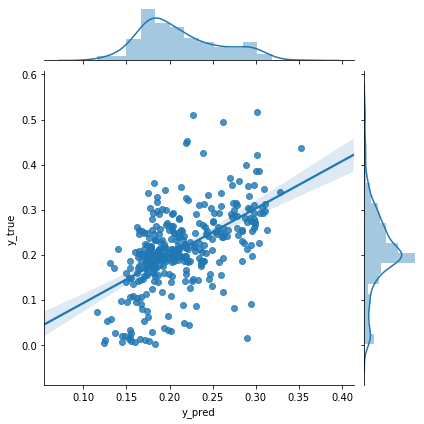

In [30]:
comp = pd.DataFrame([y_pred, y_true]).rename({0:"y_pred", 1:"y_true"}).T
plt.figure(figsize=(10, 5))
sns.jointplot(comp.y_pred, comp.y_true, kind="reg", truncate=False,)

In [31]:
knn_model_score.rename(index={0: 'knn_model'},inplace=True)

In [32]:
knn_model_score

,RMSE,MAE
knn_model,0.072537,0.051244


#### SVR

In [33]:
df_train = pd.read_csv("../data/train_fe.csv", index_col=0)
df_test = pd.read_csv("../data/test_fe.csv", index_col=0)

In [34]:
X = ['diff', 'cfc', 'WB_GDPgrowth', 'WB_Inflation', 'sektor_industrials',
       'sektor_materials', 'sektor_utilities', 'txt_cat_(-63.011, -34.811]',
       'pi_cat_(-8975.0, -1.523]', 'pi_cat_(8108.5, inf]',
       'str_cat_(0.28, inf]', 'dlc_cat_(42.262, 176.129]',
       'dlc_cat_(176.129, 200.9]', 'capex_cat_(5451.0, inf]',
       'revenue_cat_(0.174, 1248.817]', 'adv_cat_(0.3, 874.5]',
       'diff_positive', 'etr_y_past', 'etr_y_ma', 'diff_ma']
standardization = ['rok', 'ta', 'txt', 'pi', 'str', 'xrd', 'ni', 'ppent', 'intant', 'dlc', 'dltt', 'capex', 'revenue', 'cce', 'adv', 'diff', 'roa', 'lev', 'intan', 'rd', 'ppe', 'sale', 'cash_holdings', 'adv_expenditure', 'capex2', 'capex2_scaled', 'y_v2x_polyarchy', 'WB_GDPgrowth', 'WB_GDPpc', 'WB_Inflation', 'rr_per_country', 'rr_per_sector', 'ta_log', 'ppent_sqrt', 'intant_sqrt', 'roa_clip', 'lev_sqrt', 'intan_pow2', 'rd_sqrt', 'ppe_clip', 'cash_holdings_sqrt', 'diff_dta', 'etr_y_past', 'etr_y_ma', 'diff_ma', 'roa_ma', 'lev_ma', 'intan_ma', 'ppe_ma', 'sale_ma', 'cash_holdings_ma', 'roa_past', 'lev_past', 'intan_past', 'ppe_past', 'sale_past', 'cash_holdings_past', 'y_e_p_polity']

In [35]:
scaler = pickle.load(open("final_models/standardscaler.sav", 'rb'))
df_test[standardization] = scaler.transform(df_test[standardization])

In [36]:
model = pickle.load(open("final_models/svr.sav", 'rb'))

In [37]:
y_pred = model.predict(df_test.loc[:,X].values)

In [38]:
y_true = df_test.etr.tolist()
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
svr_model_score = pd.DataFrame([rmse, mae]).T.rename(columns ={0:"RMSE", 1:"MAE"})

<Figure size 720x360 with 0 Axes>

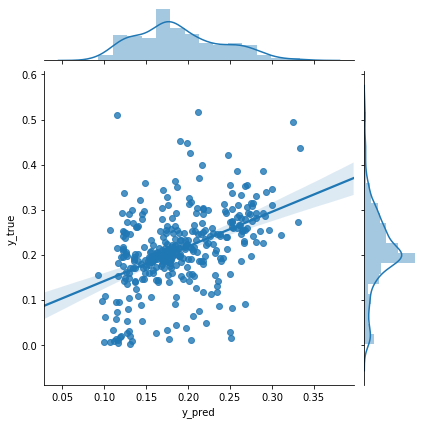

In [39]:
comp = pd.DataFrame([y_pred, y_true]).rename({0:"y_pred", 1:"y_true"}).T
plt.figure(figsize=(10, 5))
sns.jointplot(comp.y_pred, comp.y_true, kind="reg", truncate=False,)

In [40]:
svr_model_score.rename(index={0: 'svr_model'},inplace=True)

In [41]:
svr_model_score

,RMSE,MAE
svr_model,0.081393,0.059047


### Final comparison and summary

In [42]:
final_comparison = pd.concat([naive_model_score, ols_model_score, arma_model_score, ardl_model_score, knn_model_score, svr_model_score])

In [43]:
final_comparison.sort_values("RMSE")

,RMSE,MAE
knn_model,0.072537,0.051244
svr_model,0.081393,0.059047
ardl_model,0.082121,0.058620
ols_model,0.113211,0.087110
arma_model,0.124843,0.080011
naive_model,0.167860,0.091059


In [44]:
final_comparison.rename({"knn_model":"KNN", "svr_model":"SVR", "ardl_model":"ARDL", "ols_model":"OLS", "arma_model":"ARMA", "naive_model":"NAIVE MODEL"},inplace=True)

In [45]:
final_comparison = final_comparison.round(6)

In [46]:
final_comparison

,RMSE,MAE
NAIVE MODEL,0.167860,0.091059
OLS,0.113211,0.087110
ARMA,0.124843,0.080011
ARDL,0.082121,0.058620
KNN,0.072537,0.051244
SVR,0.081393,0.059047


[]

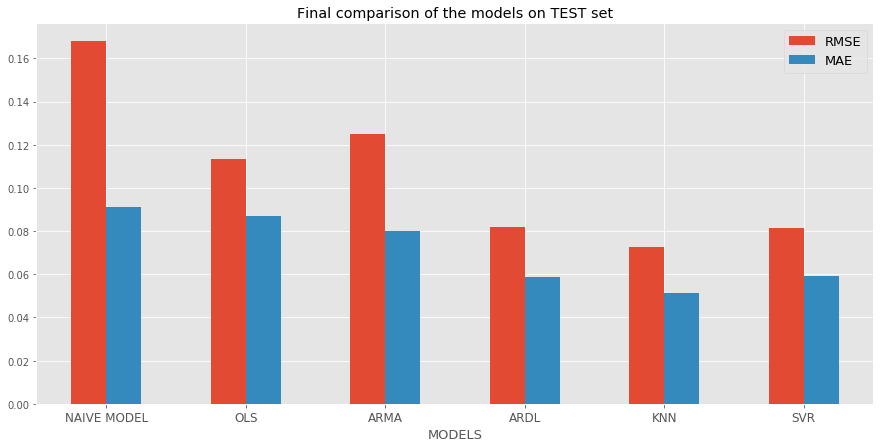

In [47]:
plt.style.use('ggplot')
ax = final_comparison.plot(kind='bar', figsize=(15, 7), title="Final comparison of the models on TEST set")
ax.legend(fontsize=13)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True, ) # labels along the bottom edge are off
ax.set_xticklabels(final_comparison.index, rotation=0, fontsize=12)
ax.set_xlabel("MODELS", fontsize=13)
ax.plot()

And the winner is: **KNN**, but we see that ARDL was very close. To be honest in the business environment for sure we will chose ARDL: cheaper - computational time; fully explainable and has less variables!

#### Final summary

Based on final scores we see that: 
 * naive model ($y_t = y_{t-1}$) have been beaten by all models
 * ARMA approach without additional exogenous variables was better than naive model
 * OLS approach without additional time-related exogenous variables was better than naive model
 * when we combined both approaches: static exogenous variables + time-related exogenous variables in ARDL model we obtained better model!
 * our best SVR (rbf) was weaker than ARDL
 * our KNN outperformed all models!

**To be honest in the business environment for sure we will chose ARDL: cheaper - computational time; fully explainable and has less variables!**